Simple Linear Regression (California Housing Dataset) : 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Loading the Dataset

In [3]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

Preparing the dataframes

In [4]:
X = df[['AveRooms']] 
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.29
R-squared: 0.01


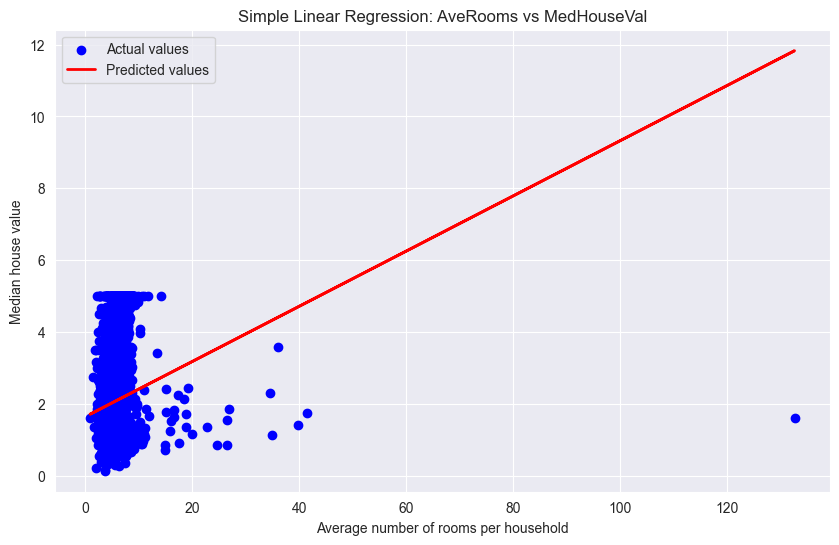

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted values')
plt.title('Simple Linear Regression: AveRooms vs MedHouseVal')
plt.xlabel('Average number of rooms per household')
plt.ylabel('Median house value')
plt.legend()
plt.show()


Multiple Linear Regression (Boston Dataset) :

Imports

In [3]:
pip install kaggle

  Using cached kaggle-1.6.14.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105128 sha256=639e2c4c8ab9e5950fd6cd7d70b9662c0afb31e3eb7ba58a065e041752451c57
  Stored in directory: d:\packages\pip\cache\wheels\89\bc\52\0d140fc172783e1e72e3af4dfc13015dc154527fafb95e65cd
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import kaggle
import os

Loading the Boston Dataset: 

In [11]:
dataset = 'altavish/boston-housing-dataset'
kaggle.api.dataset_download_files(dataset, path='./', unzip=True)
df = pd.read_csv('HousingData.csv')
os.remove('./HousingData.csv')
df = df.dropna()


Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset


PreProcessing Data: 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, df.iloc[:,-1].astype(int), test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


Model Fitting: 

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making Predictions: 

In [14]:
y_pred = model.predict(X_test)

Evaluating the Model: 

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3.6533832508866873
Coefficients: [ 0.00000000e+00  2.40771956e-02  3.21029624e-03  8.47338438e-02
  2.62464556e-03 -3.94713386e-02  2.88832855e-02  1.20811162e-02
  9.86655622e-03  2.81568738e-02 -4.76075354e-02 -4.00220286e-02
  7.46278580e-03 -6.08202083e-03  9.08792200e+00]
Intercept: 21.571428571428573


Polynomial Regression Model (AirFoil Dataset)

Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Loading AirFoil Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
column_names = [
    "Frequency", "Angle of attack", "Chord length", "Free-stream velocity", "Suction side displacement thickness", "Sound pressure level"
]
data = pd.read_csv(url, sep="\t", header=None, names=column_names)

# Display the first few rows of the dataset
print(data.head())

# Separate the features and the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Frequency  Angle of attack  Chord length  Free-stream velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction side displacement thickness  Sound pressure level  
0                             0.002663               126.201  
1                             0.002663               125.201  
2                             0.002663               125.951  
3                             0.002663               127.591  
4                             0.002663               127.461  


Creating Polynomial Features: 

In [3]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Defining Model and fitting it on airfoil Dataset

In [4]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


Evaluating Model

In [5]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training R2: {r2_train:.2f}")
print(f"Testing R2: {r2_test:.2f}")

Training MSE: 17.23
Testing MSE: 15.83
Training R2: 0.63
Testing R2: 0.68


Ploting the evaluation results: 

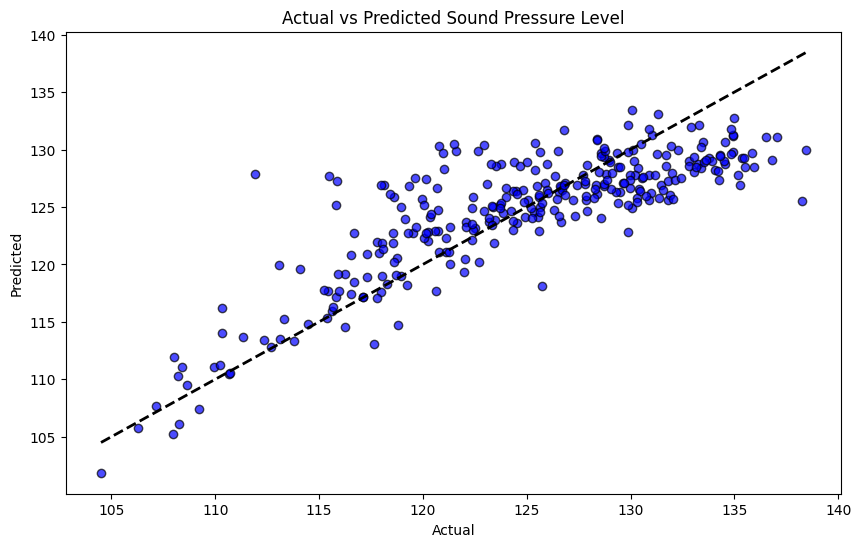

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sound Pressure Level')
plt.show()